In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

In [2]:
ds = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds633.1/2/TP',
                     chunks={'time':'500MB'})

variables = ['Total_column_water_vapour_surface_Mixed_intervals_Average',
        'Sea_surface_temperature_surface_Mixed_intervals_Average']


In [3]:
#select the two needed variables every 4th point to get 1 degree resolution
ds = ds[variables].sel(lat=slice(65, -65, 4), lon=slice(120, 300, 4))

In [4]:
ds

<xarray.Dataset>
Dimensions:                                                    (time: 516,
                                                                lat: 130,
                                                                lon: 181)
Coordinates:
  * lat                                                        (lat) float32 ...
  * lon                                                        (lon) float32 ...
  * time                                                       (time) datetime64[ns] ...
    reftime                                                    (time) datetime64[ns] dask.array<chunksize=(516,), meta=np.ndarray>
Data variables:
    Total_column_water_vapour_surface_Mixed_intervals_Average  (time, lat, lon) float32 dask.array<chunksize=(120, 130, 181), meta=np.ndarray>
    Sea_surface_temperature_surface_Mixed_intervals_Average    (time, lat, lon) float32 dask.array<chunksize=(120, 130, 181), meta=np.ndarray>
Attributes:
    Originating_or_generating_Center:     European Centre for Medium Range We...
    Originating_or_generating_Subcenter:  0
    GRIB_table_version:                   0,128
    file_format:                          GRIB-1
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention

In [5]:
ds.to_netcdf('raw_data.nc')

In [6]:
data = xr.open_dataset('raw_data.nc')

In [7]:
data

<xarray.Dataset>
Dimensions:                                                    (time: 516,
                                                                lat: 130,
                                                                lon: 181)
Coordinates:
  * lat                                                        (lat) float32 ...
  * lon                                                        (lon) float32 ...
  * time                                                       (time) datetime64[ns] ...
    reftime                                                    (time) datetime64[ns] ...
Data variables:
    Total_column_water_vapour_surface_Mixed_intervals_Average  (time, lat, lon) float32 ...
    Sea_surface_temperature_surface_Mixed_intervals_Average    (time, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:     European Centre for Medium Range We...
    Originating_or_generating_Subcenter:  0
    GRIB_table_version:                   0,128
    file_format:                          GRIB-1
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention

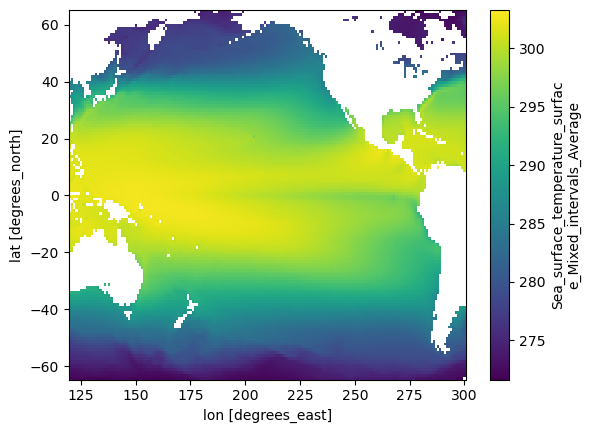

In [8]:
data['Sea_surface_temperature_surface_Mixed_intervals_Average'].mean(dim='time').plot()

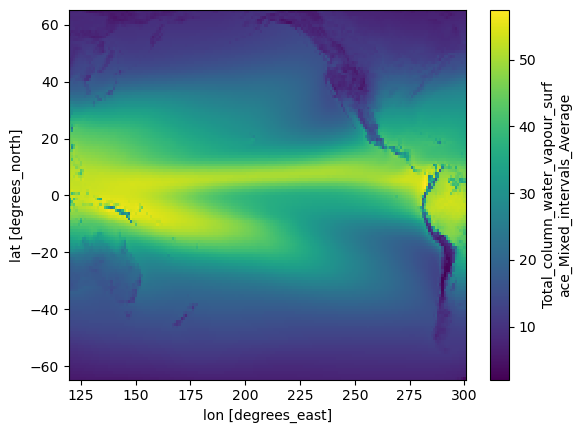

In [9]:
data['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time').plot()

In [13]:
lon = data['lon']
lat = data['lat']
sst = data['Sea_surface_temperature_surface_Mixed_intervals_Average'].mean(dim='time')
wv = data['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time')

# Create your meshgrid using lon and lat
X, Y = np.meshgrid(lon, lat)

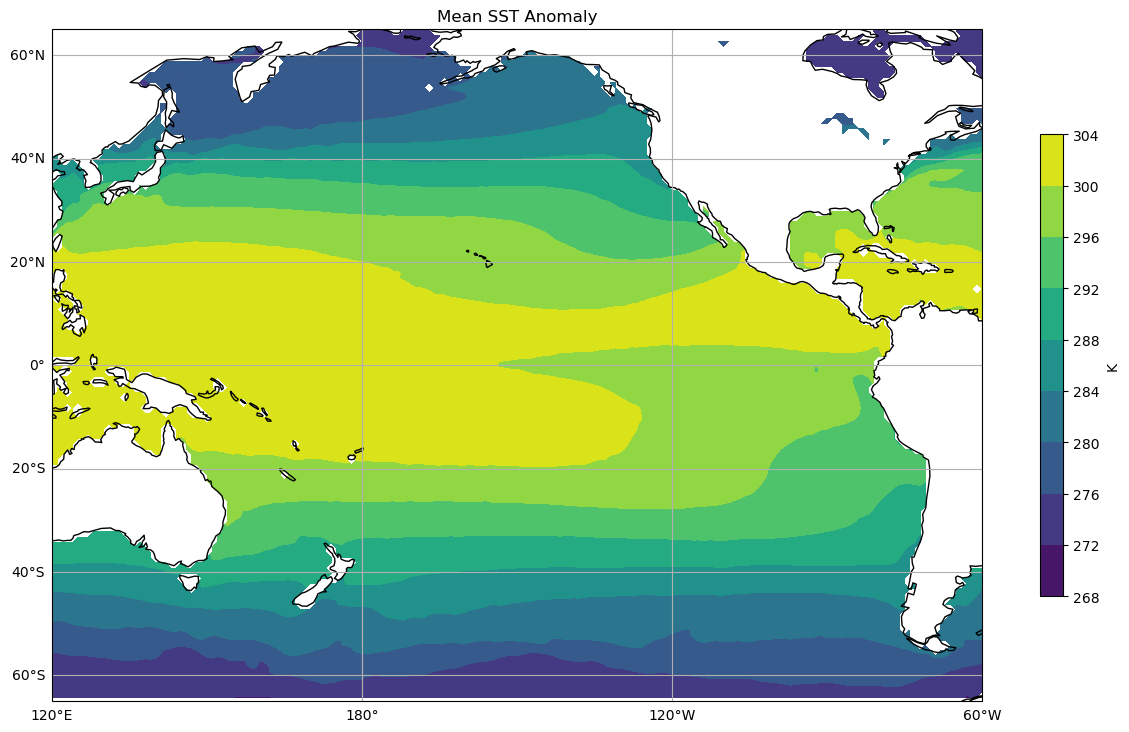

In [23]:
# A common projection to use 
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()
ax.set_title('Mean SST Anomaly')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, sst, transform=ccrs.PlateCarree())
cb=fig.colorbar(cs,shrink=0.4)

cb.set_label("K")

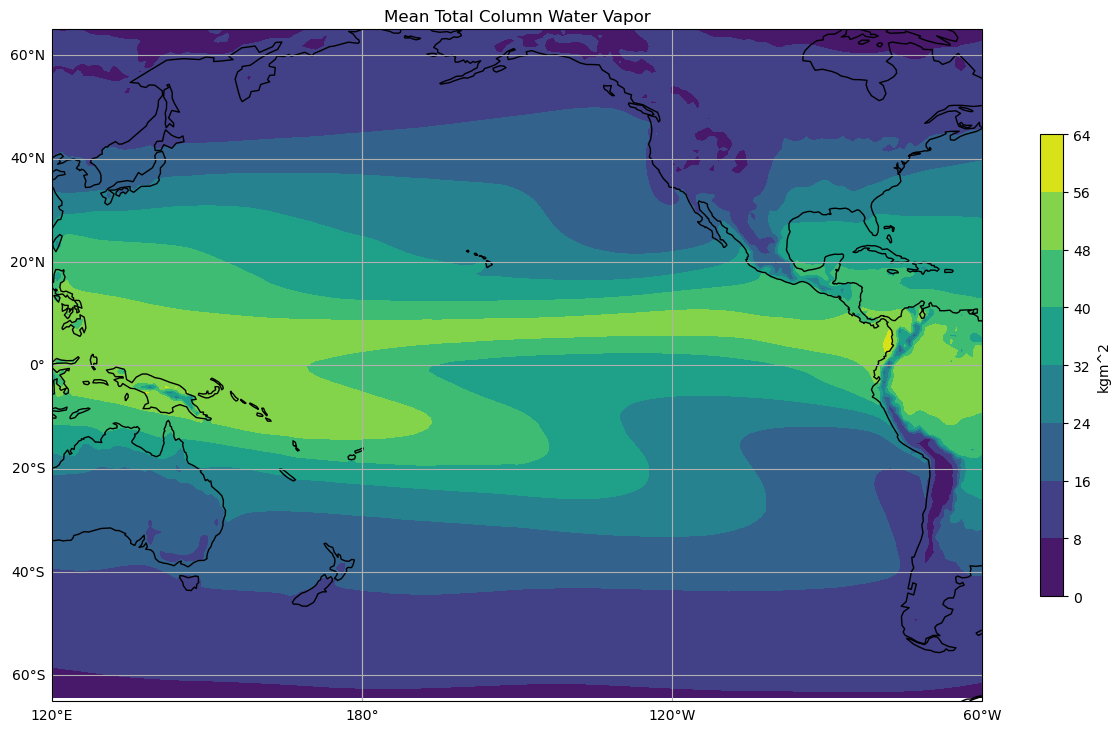

In [25]:
# A common projection to use 
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()
ax.set_title('Mean Total Column Water Vapor')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, wv, transform=ccrs.PlateCarree())
cb=fig.colorbar(cs,shrink=0.4)

cb.set_label("kgm^2")

In [26]:
masked_data = data.where(data['Sea_surface_temperature_surface_Mixed_intervals_Average'].notnull())

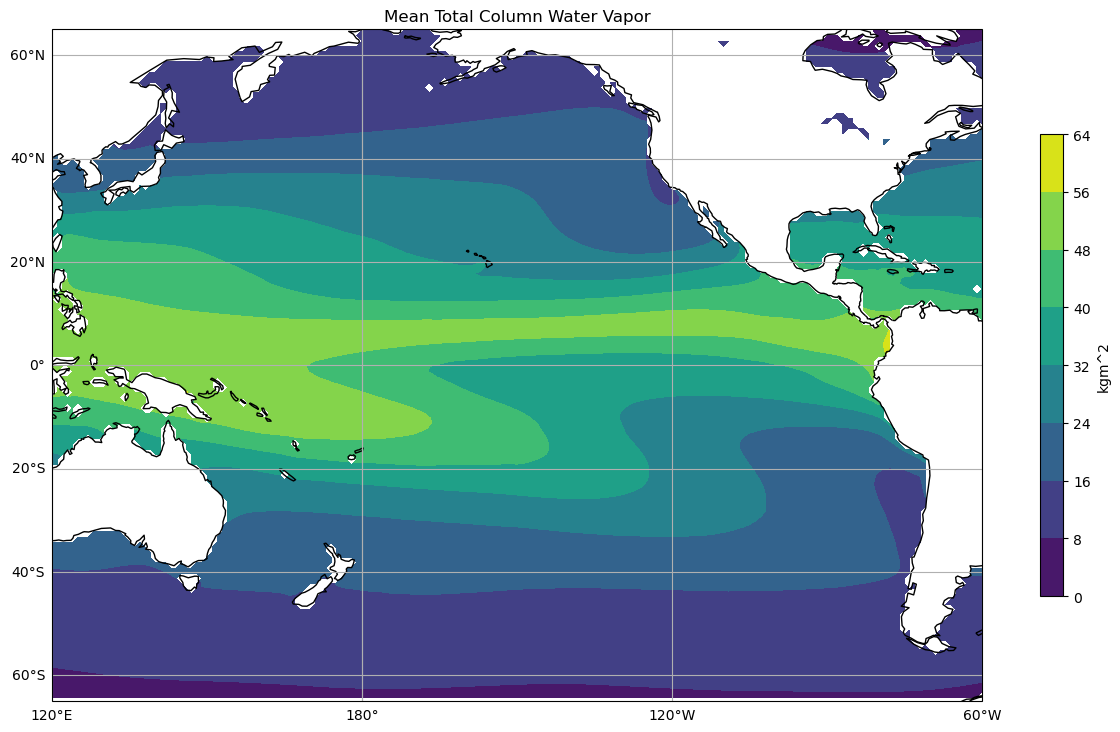

In [32]:
# Test mask by plotting mean total column water vapoer to ensure no values are plotted over land
proj=ccrs.PlateCarree(central_longitude=180)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()
ax.set_title('Mean Total Column Water Vapor')
ax.set_extent((120, 300, -65, 65), crs=ccrs.PlateCarree())

cs = ax.contourf(X, Y, masked_data['Total_column_water_vapour_surface_Mixed_intervals_Average'].mean(dim='time'), transform=ccrs.PlateCarree())
cb=fig.colorbar(cs,shrink=0.4)

cb.set_label("kgm^2")